In [1]:
#! /usr/bin/python3
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import sys, os, subprocess
import json as json
from tqdm import tqdm
import pandas as pd
import argparse
from pathlib import Path
import seaborn as sns
import matplotlib.tri as tri
sys.path.append("../")
from libraries.functions import *
from libraries.particles import *
from libraries.exhumation import *
import plotly.graph_objects as go

In [2]:
# def load_data (loc_data: str, init: str, tr = 1e-2):
#     indata = pd.read_parquet(loc_data+init)
#     indata = indata[(indata["oc"]>tr) | (indata["sed"]>tr) | (indata["opc"]>tr) | (indata["ecl"]>tr)]
#     return indata

# def get_trench_position_from_op(p, threshold = 2.7e7):
#     if {"opc"}.issubset(p.columns):
#         tr =  p.loc[(p['Points:0']< threshold) & (p["opc"] > 0.3) & (p["Points:1"] >=  p["Points:1"].max() - 2.e3),'Points:0'].min()
#     else:
#         tr =  p.loc[(p['Points:0']< threshold) & (p['op'] > 0.3) & (p["Points:1"] >=  p["Points:1"].max() - 2.e3),'Points:0'].min()
#     return tr

# def collect_particles (trench:float, min_d: float, max_d: float, init, fin):
#     data = init[(init["Points:0"] < trench - min_d) & (init["Points:0"] > trench - max_d) & (init["opc"] == 0)]
#     data = data[data["id"].isin(fin["id"])]
#     return data

In [3]:
models_loc = '/home/vturino/Vale_nas/exhumation/raw_outputs/'
csvs_loc = '/home/vturino/Vale_nas/exhumation/gz_outputs/'
json_loc = '/home/vturino/PhD/projects/exhumation/pyInput/'
model = "kinematic_mu0.13_constantVelocity/particles/"

tr  = 0.5

initial = load_data(csvs_loc, model + 'full.1.gzip', tr)
final = load_data(csvs_loc, model + 'full.50.gzip', tr)
trench= get_trench_position_from_op(initial)
dataset = collect_particles(trench, 50.e3, 350.e3, initial, final)



In [4]:
dataset["oc"][dataset["oc"]>0.5] = 1
dataset["sed"][dataset["sed"]>0.5] = 1
dataset["ecl"][dataset["ecl"]>0.5] = 1   

In [5]:
dataset["lithology"] = dataset["oc"] + 2*dataset["sed"]
dataset["lithology"] = dataset["lithology"].astype(int)
dataset["lithology"]

271955     1
271956     1
271957     1
271958     1
271959     1
          ..
5571564    2
5571565    2
5571566    2
5571567    2
5571568    2
Name: lithology, Length: 170524, dtype: int64

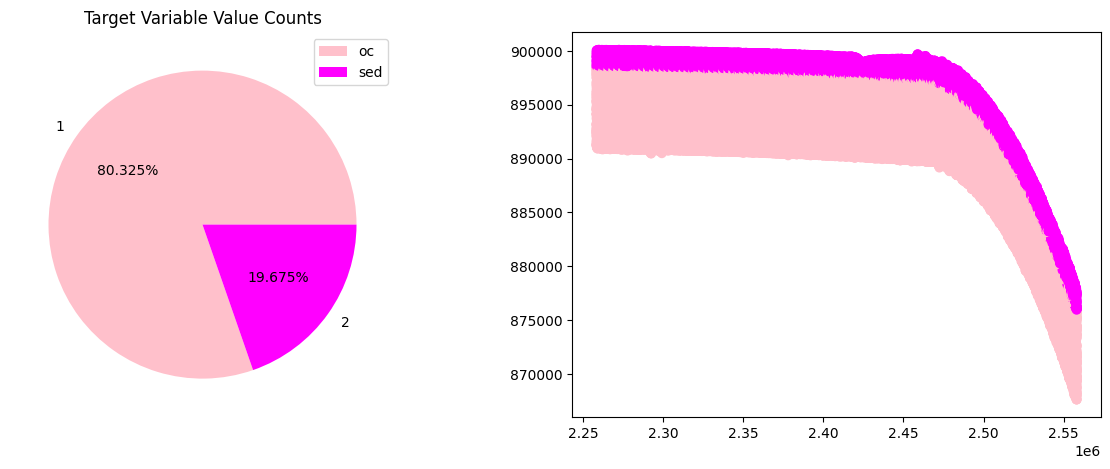

In [33]:
# get the set of distinct classes
labels = dataset.lithology.unique()

# get the count of each class
sizes = dataset.lithology.value_counts().values

# create a custom colormap
mycmap = matplotlib.colors.ListedColormap(['pink', 'magenta'])

# plot the class value counts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(sizes, labels=labels, autopct='%1.3f%%', colors=mycmap.colors)
ax[0].set_title('Target Variable Value Counts')
ax[0].legend(["oc", "sed"])

ax[1].scatter(dataset['Points:0'], dataset['Points:1'], c=dataset.lithology, cmap=mycmap)

plt.show()

In [38]:
msk = np.random.rand(len(dataset)) < 0.1
train = dataset[msk]
test = dataset[~msk]

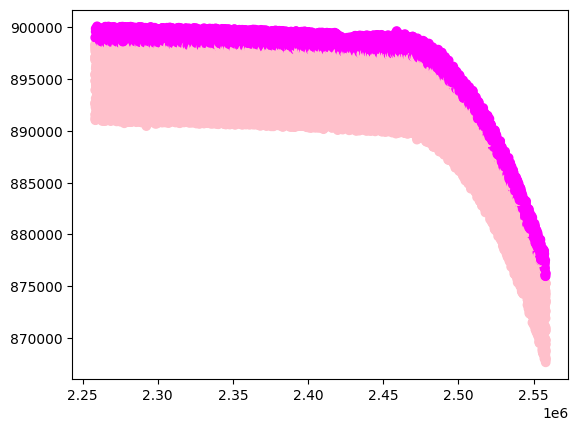

In [39]:
plt.scatter(train['Points:0'], train['Points:1'], c=train.lithology, cmap=mycmap)

In [40]:
# plt.scatter(test['Points:0'], test['Points:1'], c=test['sed'], cmap='viridis')

In [41]:
train

,initial position:0,initial position:1,initial position:2,position:0,position:1,position:2,velocity:0,velocity:1,velocity:2,id,...,integrated strain_1,integrated strain_2,integrated strain_3,integrated strain invariant,p,T,Points:0,Points:1,Points:2,lithology
271969,2272758.00,897006.5000,0.0,2278694.25,897406.8125,0.0,3.555400e-10,3.289091e-11,0.0,4873984.0,...,0.003141,-0.003051,1.000026,0.003538,6.110893e+07,320.265869,2278694.25,897406.8125,0.0,1
271978,2272446.00,896971.3750,0.0,2278382.00,897372.6875,0.0,3.555055e-10,3.292505e-11,0.0,4873971.0,...,0.003171,-0.003040,0.999987,0.003504,6.191850e+07,320.856018,2278382.00,897372.6875,0.0,1
272022,2272716.75,897706.8125,0.0,2278655.25,898107.0625,0.0,3.556055e-10,3.282334e-11,0.0,4874027.0,...,0.002757,-0.002743,0.999847,0.003377,4.333495e+07,308.285217,2278655.25,898107.0625,0.0,1
272037,2272964.50,897863.0000,0.0,2278903.75,898262.4375,0.0,3.556463e-10,3.278398e-11,0.0,4874036.0,...,0.002766,-0.002716,0.999995,0.003521,3.941439e+07,305.587555,2278903.75,898262.4375,0.0,1
272040,2272336.00,898011.8750,0.0,2278275.25,898413.0625,0.0,3.555891e-10,3.282121e-11,0.0,3822143.0,...,0.002549,-0.002499,0.999663,0.003095,3.568573e+07,303.000092,2278275.25,898413.0625,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571511,2271218.50,899435.5625,0.0,2277161.25,899838.9375,0.0,3.555413e-10,3.271208e-11,0.0,3822120.0,...,0.002500,-0.002510,0.999708,0.003529,2.073036e+06,277.942596,2277161.25,899838.9375,0.0,2
5571529,2271310.75,899137.5000,0.0,2277252.50,899540.7500,0.0,3.555271e-10,3.273820e-11,0.0,4873895.0,...,0.002463,-0.002407,0.999534,0.003470,9.208190e+06,283.228027,2277252.50,899540.7500,0.0,2
5571541,2271758.00,899045.1875,0.0,2277700.00,899447.3750,0.0,3.555804e-10,3.272153e-11,0.0,3822114.0,...,0.002270,-0.002266,0.999448,0.003400,1.139289e+07,284.863129,2277700.00,899447.3750,0.0,2
5571550,2272119.00,899110.4375,0.0,2278050.00,899490.3750,0.0,3.556328e-10,3.269454e-11,0.0,5222232.0,...,0.002259,-0.002207,0.999613,0.003468,1.032785e+07,284.086365,2278050.00,899490.3750,0.0,2


In [37]:
test

,initial position:0,initial position:1,initial position:2,position:0,position:1,position:2,velocity:0,velocity:1,velocity:2,id,...,integrated strain_1,integrated strain_2,integrated strain_3,integrated strain invariant,p,T,Points:0,Points:1,Points:2,lithology
271956,2272372.00,896644.4375,0.0,2278307.00,897046.1250,0.0,3.554670e-10,3.296347e-11,0.0,4873480.0,...,0.003115,-0.002989,1.000048,0.003536,7.022696e+07,326.364349,2278307.00,897046.1250,0.0,1
271958,2272221.50,897146.6875,0.0,2278140.25,897477.4375,0.0,3.554914e-10,3.293764e-11,0.0,5489211.0,...,0.002966,-0.002857,0.999808,0.003331,5.920505e+07,319.089478,2278140.25,897477.4375,0.0,1
271959,2272941.50,896610.5000,0.0,2278876.50,897010.3125,0.0,3.555221e-10,3.291529e-11,0.0,3822004.0,...,0.002808,-0.002818,0.999717,0.003250,7.131318e+07,326.940948,2278876.50,897010.3125,0.0,1
271960,2272955.25,897362.7500,0.0,2278892.75,897762.2500,0.0,3.555959e-10,3.283500e-11,0.0,4873988.0,...,0.003078,-0.002980,1.000084,0.003595,5.202670e+07,314.202698,2278892.75,897762.2500,0.0,1
271963,2272955.25,896955.8750,0.0,2278891.50,897355.5000,0.0,3.555551e-10,3.287633e-11,0.0,4873995.0,...,0.003032,-0.002939,0.999967,0.003470,6.246158e+07,321.125916,2278891.50,897355.5000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571560,2272053.25,899532.8750,0.0,2277828.00,899897.6250,0.0,3.556265e-10,3.265068e-11,0.0,5041644.0,...,0.002165,-0.002072,0.999671,0.003706,6.615732e+05,276.870056,2277828.00,899897.6250,0.0,2
5571561,2271524.00,898940.6875,0.0,2277465.25,899343.5625,0.0,3.555423e-10,3.275004e-11,0.0,4873891.0,...,0.002276,-0.002285,0.999360,0.003344,1.390282e+07,286.710175,2277465.25,899343.5625,0.0,2
5571562,2272168.25,898966.6250,0.0,2278110.00,899367.7500,0.0,3.556345e-10,3.270920e-11,0.0,3822186.0,...,0.002347,-0.002306,0.999687,0.003439,1.322959e+07,286.253876,2278110.00,899367.7500,0.0,2
5571565,2271534.50,899307.0000,0.0,2277476.75,899709.6250,0.0,3.555671e-10,3.270090e-11,0.0,4873938.0,...,0.002344,-0.002325,0.999617,0.003568,5.155996e+06,280.224731,2277476.75,899709.6250,0.0,2
